<a href="https://colab.research.google.com/github/mingshey/python_wave/blob/main/Wave2d_Barrier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter

In [ ]:
from scipy.ndimage import convolve, generate_binary_structure

In [ ]:
simname = 'barrier2'

In [ ]:
kern = generate_binary_structure(2, 1).astype(float)
kern[1,1] = -4

In [ ]:

def wavestep(past, curr, medsq, rows, cols, tval):
  '''
  2D wave simulation by finite element method.
  Takes past and current(curr) state of mesh sizee rows by cols
  and returns the state one step into the future(fut).
  med is the medium characteristics, i.e. wave speed divided by h/Dt.
  medsq is medium value squared.
  tval is the current time value: used to give time-dependent forced oscillation
  '''
  global kern, dt, omega, barrier
  fut = 2 * curr - past + convolve(medsq * curr, kern)
  fut[barrier] = 0.0

  """
  강제 진동 (직선 파원)
  """
  fut[:,0] = 10.0*np.sin(omega * tval)

  return ([curr, fut, tval + dt])

In [ ]:
rs = 128                       # number of rows
cs = 128                       # number of columns
speed = 5.0                    # medium interaction speed
wavelen = 0.10
omega = speed / wavelen * 2* np.pi
dt = 0.0001                    # time step
dx = 0.01                      # mesh grid size
cspeed = dx/dt                 # characteristic speed dx/dt
r = speed / cspeed             # mesh interaction rate
pm = np.zeros((rs, cs))   # past mesh matrix
cm = np.zeros((rs, cs))   # current mesh matrix
mm = np.ones((rs, cs)) * r     # medium characteristics matrix
"""
Change parts of medium characteristics to establish barriers or interfaces:

  속도가 다른 매질 경계선으로 장벽을 정의
  (0,0)                 (0,cs-1)
  +---------------------+
  |                     |
  |                     |
  |     장벽            |
  |      ++             |
  |      ||             |
  |      ||             |
  |      ||             |
  +------++-------------+
  (rs-1,0)              (rs-1, cs-1)
"""
mm[rs//2:, cs//4-1:cs//4+5] = 0 # Barrier
barrier = mm == 0

#mm[rs//2-rs//8:rs//2-rs//16,cs//4:cs//4+2] = r # First slit in the barrier
#mm[rs//2+rs//16:rs//2+rs//8,cs//4:cs//4+2] = r # Second slit in the barrier

msq = mm**2

t = 0.0                        # initial time value
#cm[rs//2:rs//2+2, cs//10:cs//10+2] = 5.0
#pm[rs//2:rs//2+2, cs//10:cs//10+2] = 5.0


In [ ]:
row_sample = rs // 2 + rs // 16
#col_sample = cs * 3 // 5

advance = 20
N=2500
n=N//advance

maps = np.empty((0, rs, cs))
ts = np.array([])

for k in range(n):
  for i in range(advance):    # advance 5 steps between snapshots
    pm, cm, t = wavestep(pm, cm, msq, rs, cs, t)
  maps = np.append(maps, [cm], axis=0)
  ts = np.append(ts,[t])

In [ ]:
maps.shape

(125, 128, 128)

In [ ]:
plt.contour?

In [ ]:
def frame(i):
  ax[0].cla()
  plt.subplot(121)
  ax[0].imshow(maps[i], vmin=-20, vmax=20)  # add medium characteristics to the snapshot image for recognition's sake
  ax[0].contour(mm, [r/2], colors="white")
  ax[0].axhline(row_sample, color='red', alpha=0.3)
  ax[0].set_xlabel("x (cm)")   # x-axis label
  ax[0].set_ylabel("y (cm)")   #y-axis label
  ax[0].set_title(f"time = {t:.3g} (s)")   # time into for the snapshot
  plt.subplot(122)
  ax[1].cla()
  ax[1].grid()
  ax[1].set_ylim([-50,50])
  ax[1].plot(maps[i, row_sample, :], label='sample line(red)')
  ax[1].plot(mm[row_sample, :]/r*10, c='gray', label='wave speed')
  ax[1].legend()

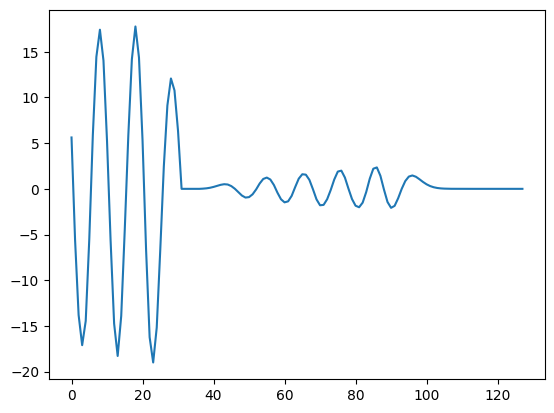

In [ ]:
plt.plot(maps[100, row_sample, :])

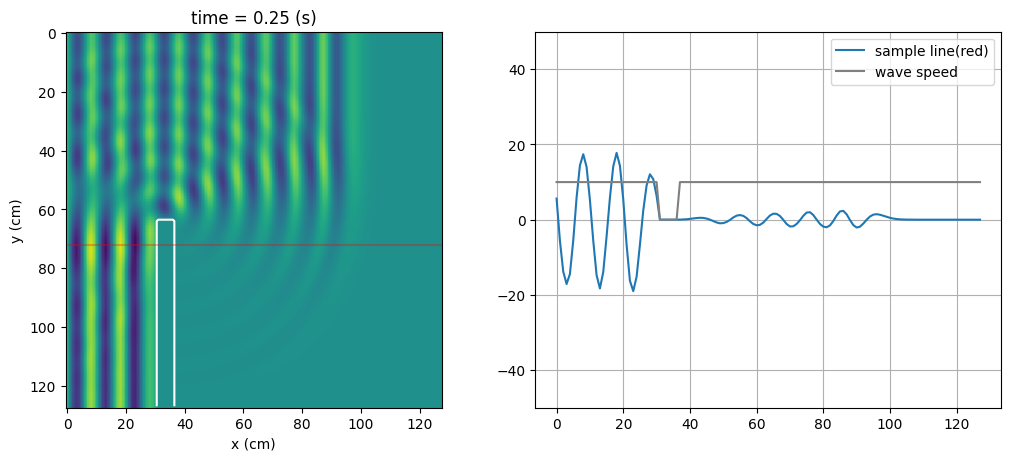

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4.5), constrained_layout=True)
frame(100)

In [ ]:
ani = anim.FuncAnimation(fig, frame, frames=n)

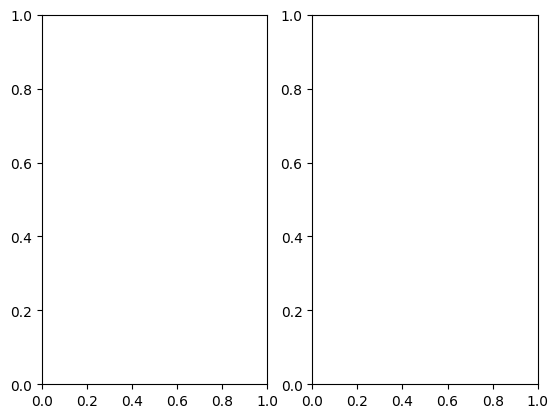

In [ ]:
ani.save(simname + '.gif', writer = 'pillow', fps = 20)

In [ ]:
ani.save(simname + '.avi', dpi = 150, fps = 20)